In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
from osu_util import read_osu_log, read_osu_log_multi, plot_osu

In [3]:
ls osu_log_pleiades/pt2pt_multi/

run1/  run10/ run2/  run3/  run4/  run5/  run6/  run7/  run8/  run9/


In [4]:
ls osu_log_pleiades/pt2pt_multi/run1/rdma/

mbw_mr.log


In [5]:
cat osu_log_pleiades/pt2pt_multi/run1/rdma/mbw_mr.log

# OSU MPI Multiple Bandwidth / Message Rate Test v5.6.1
# Size          Latency (us)
# [ pairs: 24 ] [ window size: 64 ]
# Size                  MB/s        Messages/s
1                      13.49       13488814.11
2                      26.86       13431108.92
4                      53.85       13463236.05
8                     108.33       13540901.98
16                    158.85        9928001.98
32                    399.12       12472654.19
64                    784.07       12251061.29
128                   696.34        5440179.83
256                  1157.55        4521685.55
512                  1707.57        3335100.67
1024                 2475.19        2417175.49
2048                 2947.30        1439109.91
4096                 3706.87         904997.77
8192                 4381.29         534825.17
16384                4142.17         252817.80
32768                4428.92         135160.06
65536                4588.64          70017.04
131072               4479.52     

In [6]:
read_osu_log('osu_log_pleiades/pt2pt_multi/run1/rdma/mbw_mr.log', skiprows=4)

,size
1,13.49
2,26.86
4,53.85
8,108.33
16,158.85
32,399.12
64,784.07
128,696.34
256,1157.55
512,1707.57


In [7]:
def read_osu_all_runs(suffix, prefix='osu_log_pleiades/pt2pt_multi/', runs=10):
    file_list = [
        prefix + 'run{}'.format(i) + suffix for i in range(1, 11)
    ]
    df = read_osu_log_multi(file_list, skiprows=4)
    return df

def stats(df):
    # similar to df.T.describe().T
    return df.apply(['mean', 'std', 'median', 'min', 'max'], axis=1)

In [8]:
mbw_rdma = read_osu_all_runs('/rdma/mbw_mr.log')
stats(mbw_rdma)

,mean,std,median,min,max
1,13.417,0.100890,13.440,13.28,13.57
2,26.803,0.222713,26.770,26.59,27.12
4,53.337,0.606301,53.430,52.34,54.05
8,107.439,1.098134,107.095,106.04,109.78
16,197.947,13.881720,202.590,158.85,205.11
32,402.195,2.920119,401.810,398.14,406.42
64,778.512,6.533899,782.485,767.54,784.07
128,717.920,27.669906,713.665,670.87,773.12
256,1169.914,49.786469,1177.265,1058.73,1244.72
512,1740.304,43.391737,1740.985,1665.82,1807.42


In [9]:
mbw_tcp = read_osu_all_runs('/tcp/mbw_mr.log')
stats(mbw_tcp)

,mean,std,median,min,max
1,1.455,1.553314,0.505,0.17,4.23
2,2.966,3.238625,0.920,0.42,8.59
4,5.919,6.531531,1.715,0.82,17.19
8,11.228,13.030703,3.385,1.43,34.39
16,24.705,25.389078,10.010,2.72,68.77
32,45.938,45.214158,20.305,12.50,127.78
64,98.309,88.254725,59.810,20.60,256.56
128,30.733,31.015222,20.785,10.92,116.25
256,78.309,61.359459,59.425,19.88,228.39
512,143.805,113.939718,123.635,46.26,447.65


In [10]:
mbw_list = [mbw_rdma, mbw_tcp]
mpi_cases = ['Native RDMA', 'TCP']

mbw_mean_all = pd.concat([df.mean(axis=1) for df in mbw_list], keys=mpi_cases, axis=1)
mbw_mean_all

,Native RDMA,TCP
1,13.417,1.455
2,26.803,2.966
4,53.337,5.919
8,107.439,11.228
16,197.947,24.705
32,402.195,45.938
64,778.512,98.309
128,717.920,30.733
256,1169.914,78.309
512,1740.304,143.805


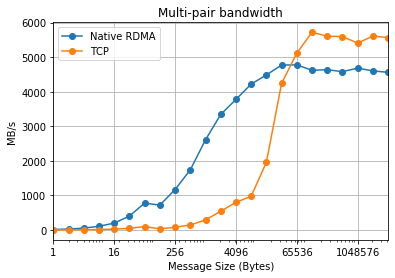

In [11]:
plot_osu(mbw_mean_all)
plt.title('Multi-pair bandwidth')
plt.ylabel('MB/s');